In [2]:
import transformers
from transformers import pipeline
import numpy as np
import pandas as pd
from datasets import Dataset, load_metric
import pandas as pd
import torch
import random

/home/admen/Desktop/component_reability_app-master/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-24 17:09:09.498376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 17:09:10.468171: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [69]:
groups = [
 'Конденсаторы керамические постоянной ёмкости поверхностного монтажа',
 'Конденсаторы оксидно-полупроводниковые',
 'Конденсаторы оксидно-электролитические алюминиевые',
 'Конденсаторы стеклянные',
 'Конденсаторы триммеры',
 'Резисторы постоянные проволочные'
 'Диоды низкочастотные',
 'Транзисторы биполярные низкочастотные',
 'Транзисторы полевые низкочастотные'
 ]

In [70]:
classifier = transformers.pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

text = 'C1608X5R1E105K080AC, Многослойный керамический конденсатор SMD, 1 мкФ, 25 В, 0603 [1608 Метрический], ± 10%, X5R, C Series ; Capacitance, 1ВµF'

prediction = classifier(text, groups)

print(prediction['scores'])

[0.38342076539993286, 0.1555454134941101, 0.1412888467311859, 0.10173190385103226, 0.08852401375770569, 0.05713075399398804, 0.03627506643533707, 0.03608318418264389]


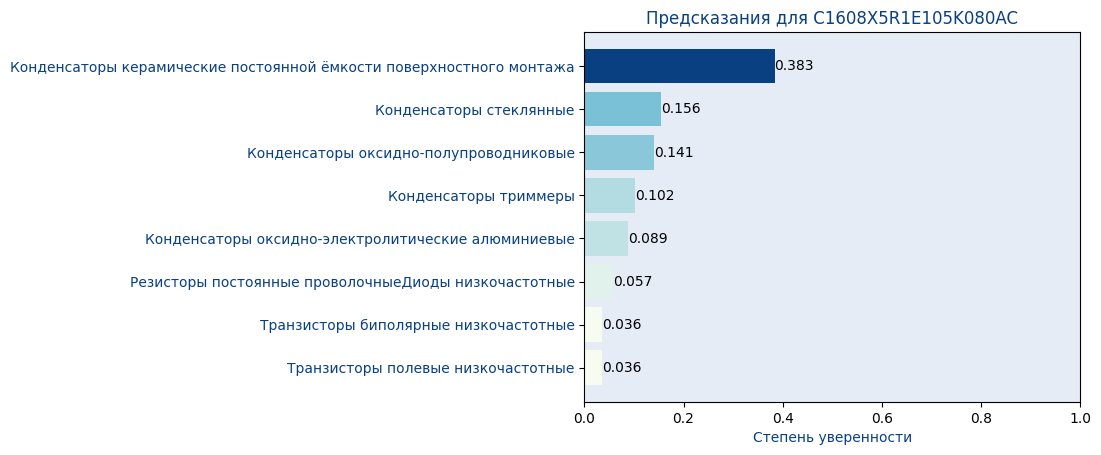

In [72]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Example data
labels = prediction['labels']
y_pos = np.arange(len(labels))
confidence = np.array(prediction['scores'])

# Create a colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', [ '#f6fcf0', '#43a5ca', '#094081'])
# Normalize the data to be between 0 and 1
norm = plt.Normalize(confidence.min(), confidence.max())
# Map the normalized data to colors
colors = cmap(norm(confidence))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, confidence, align='center', color=colors)
ax.set_yticks(y_pos, labels=labels, color='#094081')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Степень уверенности', color='#094081')
ax.set_title('Предсказания для C1608X5R1E105K080AC', color='#094081')

ax.bar_label(hbars, fmt='%.3f')
ax.set_xlim(right=1)
ax.set_facecolor('#e5ecf6')

plt.show()

In [1]:
import transformers
from transformers import pipeline
import numpy as np
import pandas as pd
from datasets import Dataset, load_metric
import pandas as pd
import torch
import random

/home/admen/Desktop/component_reability_app-master/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-22 18:04:15.037291: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 18:04:15.808686: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.41.0', '0.30.1')

In [4]:
# torch.cuda.empty_cache() # clear cache
# torch.cuda.is_available() #check if have gpu 

False

In [3]:
groups = """Конденсаторы: Керамические постоянной ёмкости
Конденсаторы: Бумажные / с органическим синтетическим диэлектриком
Конденсаторы: Керамические постоянной ёмкости поверхностного монтажа
Конденсаторы: Керамические постоянной ёмкости термокомпенсационные
Конденсаторы: Объемно-пористые
Конденсаторы: Оксидно-полупроводниковые
Конденсаторы: Оксидно-полупроводниковые поверхностного монтажа
Конденсаторы: Оксидно-электролитические алюминиевые
Конденсаторы: Переменные поршневого типа трубчатые подстроечные
Конденсаторы: Слюдяные
Конденсаторы: Стеклянные
Конденсаторы: триммеры""".split('\n')

template = "This example is {}"

In [4]:
classifier = transformers.pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

text = "C1608X5R1E105K080AC TDK Multilayer Ceramic Capacitors MLCC - SMD/SMT 0603 25VDC 1uF 10% X5R 0.8mm datasheet, inventory, & pricing."

prediction = classifier(text, groups)

print(prediction['sequence'])
print(prediction['labels'])

print()

print(prediction['scores'])

C1608X5R1E105K080AC TDK Multilayer Ceramic Capacitors MLCC - SMD/SMT 0603 25VDC 1uF 10% X5R 0.8mm datasheet, inventory, & pricing.
['Конденсаторы: Бумажные / с органическим синтетическим диэлектриком', 'Конденсаторы: Переменные поршневого типа трубчатые подстроечные', 'Конденсаторы: Оксидно-полупроводниковые поверхностного монтажа', 'Конденсаторы: Керамические постоянной ёмкости поверхностного монтажа', 'Конденсаторы: Керамические постоянной ёмкости термокомпенсационные', 'Конденсаторы: Керамические постоянной ёмкости', 'Конденсаторы: Оксидно-электролитические алюминиевые', 'Конденсаторы: Объемно-пористые', 'Конденсаторы: Оксидно-полупроводниковые', 'Конденсаторы: Стеклянные', 'Конденсаторы: Слюдяные', 'Конденсаторы: триммеры']
[0.11248669028282166, 0.09924923628568649, 0.0981050431728363, 0.09333395212888718, 0.08673533797264099, 0.08308106660842896, 0.08123376965522766, 0.07533367723226547, 0.07394271343946457, 0.07020264118909836, 0.06627160310745239, 0.060024309903383255]


In [5]:
df = pd.read_csv("data.csv")

In [6]:
df_train = df.head(1)
df_test = df.tail(1)

train_ds = Dataset.from_pandas(df_train, split="train")
test_ds = Dataset.from_pandas(df_test, split="test")

In [7]:
from transformers import BartTokenizerFast, BartForSequenceClassification, Trainer, TrainingArguments, EvalPrediction

tokenizer = BartTokenizerFast.from_pretrained('facebook/bart-large-mnli')

In [8]:
def create_input_sequence(sample):
  text = sample["text"]
  label = sample["label"]
  contradiction_label = random.choice([x for x in groups if x != label])
  encoded_sequence = tokenizer(text * 2, [template.format(label), template.format(contradiction_label)], truncation = True, padding = 'max_length')
  encoded_sequence["labels"] = [2, 0]
  encoded_sequence["input_sentence"] = tokenizer.batch_decode(encoded_sequence.input_ids)
  return encoded_sequence


train_dataset = train_ds.map(create_input_sequence, batched = True, batch_size = 1, remove_columns = ["label", "text"])
test_dataset = test_ds.map(create_input_sequence, batched = True, batch_size = 1, remove_columns = ["label", "text"])

Map: 100%|██████████| 1/1 [00:00<00:00, 41.41 examples/s]


In [9]:
def compute_metrics(p: EvalPrediction):
  metric_acc = load_metric("accuracy")
  metric_f1 = load_metric("f1")
  preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
  preds = np.argmax(preds, axis = 1)
  result = {}
  result["accuracy"] = metric_acc.compute(predictions = preds, references = p.label_ids)["accuracy"]
  result["f1"] = metric_f1.compute(predictions = preds, references = p.label_ids, average = 'macro')["f1"]
  return result

In [10]:
training_args = TrainingArguments(
  output_dir = "./",                # Output directory
  num_train_epochs = 2,             # Total number of training epochs
  per_device_train_batch_size = 4,  # Batch size per device during training
  per_device_eval_batch_size = 8,   # Batch size for evaluation
  warmup_steps = 50,                # Number of warmup steps for learning rate scheduler
  weight_decay = 0.01,              # Strength of weight decay
)

model = BartForSequenceClassification.from_pretrained("facebook/bart-large-mnli", num_labels = len(groups), ignore_mismatched_sizes = True)

trainer = Trainer(
  model = model,                     # The instantiated model to be trained
  args = training_args,              # Training arguments, defined above
  compute_metrics = compute_metrics, # A function to compute the metrics
  train_dataset = train_dataset,     # Training dataset
  eval_dataset = test_dataset,       # Evaluation dataset
  tokenizer = tokenizer              # The tokenizer that was used
)

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large-mnli and are newly initialized because the shapes did not match:
- classification_head.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([12]) in the model instantiated
- classification_head.out_proj.weight: found shape torch.Size([3, 1024]) in the checkpoint and torch.Size([12, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()

In [ ]:
model.save_pretrained('./saved/')

In [ ]:
classifier = transformers.pipeline("zero-shot-classification", model=model)

text = "C1608X5R1E105K080AC TDK Multilayer Ceramic Capacitors MLCC - SMD/SMT 0603 25VDC 1uF 10% X5R 0.8mm datasheet, inventory, & pricing."

prediction = classifier(text, groups)

print(prediction['sequence'])
print(prediction['labels'])
print(prediction['scores'])